# $Z^0$ decays: finding the $Z^0$ boson mass

In [10]:
import uproot
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = uproot.open("https://atlas-opendata.web.cern.ch/atlas-opendata/samples/2020/1largeRjet1lep/MC/mc_361106.Zee.1largeRjet1lep.root")

In [3]:
events = f["mini"]

In [5]:
import hist
from hist import Hist

In [6]:
Z0_hist = Hist(hist.axis.Regular(30, 40, 100, name="Mass [GeV]"))

## Invariant mass

$$E = Mc^2 + \bar{p}^2 c^2 \; ; \; E = E_1 + E_2 \; , \; \bar{p} = \bar{p}_1 + \bar{p}_2 \longrightarrow Mc^2 = \sqrt{E^2 - \bar{p}^2 c^2}$$

Particle of mass $M$ and energy $E$ decays into $2$ particles with masses $m_1$, $m_2$ and energies $E_1$, $E_2$

Conservation of energy and momentum:

$$Mc^2 = \sqrt{(E_1 + E_2)^2 - (\bar{p}_1 + \bar{p}_2)c^2}$$

$$= \sqrt{E_1^2 + 2E_1 E_2 + E_2^2 - \bar{p}_1^2 c^2 - 2\bar{p}_1 \bullet \bar{p}_2 c^2 - \bar{p}_2^2 c^2}$$

$$= \sqrt{2 E_1 + E_2 - 2c^2 \vert \bar{p}_1^2 \vert \vert \bar{p}_2^2\vert cos(\theta) + m_1^2 c^4 + m_2^2 c^4} \; \; \; \; \; (1)$$

Relativistic dispersion relation can be brought to following format

$$M^2 c^4 = E^2 - \bar{p}^2 c^2 \longrightarrow E = \sqrt{\bar{p}^2 c^2 + M^2 c^4}$$

From where by setting $c = 1$ (natural units)

$$M = \sqrt{(E)^2 - (\bar{p})^2} = \sqrt{(E_1 + E_2)^2 - (\bar{p}_1 + \bar{p}_2)^2} \; \; \; \; \; (2)$$

And

$$E = \sqrt{\bar{p}^2 + M^2} \; \; \; \; \; (3)$$

Assuming mass of particles very small compared to momenta, find

$$E = \sqrt{\bar{p}^2 + M^2} = \vert \bar{p} \vert \sqrt{1 + \frac{M^2}{\bar{p}^2}} \xrightarrow[]{M \lt \lt \vert \bar{p} \vert} \vert \bar{p} \vert$$

Apply $E = \bar{p}$ derived above and set $c = 1$ to $(1)$, reduce to format

$$M = \sqrt{2E_1 E_2 (1 - cos (\theta))}$$

where $\theta$ is angle between momentum vectors of particles.

In experimental particle physics, formula is given by

## Cuts

In [11]:
def inv_mass(pt1,pt2,eta1,eta2,phi1,phi2):
    return np.sqrt(2*pt1*pt2 * (np.cosh(eta1 - eta2) - np.cos(phi1 - phi2)))

In [14]:
sel_events = events.arrays(["lep_pt", "lep_eta", "lep_phi", "lep_E","lep_charge", "lep_type", "lep_n"])

for event in sel_events:
    # Cut #1: At least 2 leptons in the event. lep_n  is the number of them.
    
    lep_n = event["lep_n"]    
    if lep_n >= 2:
        
        # Cut #2: Leptons with opposite charge.
        #We have a list of charges, each corresponding to a lepton: lep_charges.
        #Clearly, we can't let these be equal
        lep_charge = event["lep_charge"]
        if (lep_charge[0] != lep_charge[1]):
            
            # Cut #3: Leptons of the same family (2 electrons or 2 muons).
            # lep_type gives back a number, which is a code for what kind of lepton it is.
            lep_type = event["lep_type"]
            if ( lep_type[0] == lep_type[1]):
                
                # By now we should only have paricles that look right remaining.
                
                # Let's set the components of a TLorentzVector for each lepton.
                # Notice that the energy and momenta are given in MeV!
                
                lep_pt = event["lep_pt"]
                lep_eta = event["lep_eta"]
                lep_phi = event["lep_phi"]
                lep_E = event["lep_E"]
                
                Z0_boson = inv_mass(lep_pt[0],lep_pt[1],lep_eta[0],lep_eta[1],lep_phi[0],lep_phi[1])
                
                #leadLepton.SetPtEtaPhiE(lep_pt[0]/1000., lep_eta[0], lep_phi[0], lep_E[0]/1000.)
                #trailLepton.SetPtEtaPhiE(lep_pt[1]/1000., lep_eta[1], lep_phi[1], lep_E[1]/1000.)
                
                
                
                # Now, reconstruct the Z0 boson Lorentz vector! 
                # Remember, we can add them just like normal vectors.
                #Z0_boson = leadLepton + trailLepton
                
                # Put this particular value into the histogram.
                Z0_hist.fill(Z0_boson)

/opt/ppd/software/anaconda/users/jhb73899/envs/notebook/lib/python3.7/site-packages/mplhep/error_estimation.py:40: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,


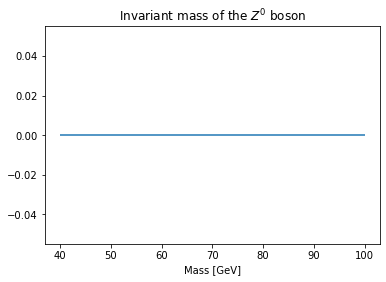

In [15]:
Z0_hist.plot()
plt.title("Invariant mass of the $Z^0$ boson")
plt.show()